$$\text{STA} 9705 $$
$$\text{Final Project}$$


Directions: You are not allowed to discuss this exam with anyone but your instructor. When
answering a question, first write down ***your complete answer**, and **then show relevant SAS**
output (if any). You cannot only show SAS output without any illustration. Clearly label all
the answers. Attach your full version of SAS code to the end. Any submission not in such
format will not be accepted. The data sets are available on Blackboard. Good luck!

# Q1

*The data in the file iris.txt contain observations on X_1 = Sepal length, X_2 = Sepal width, X_3 = Petal length and X_4 = Petal width for samples from **three species of iris** (1 = Iris setosa; 2 = Iris versicolor; 3 = Iris virginica).*

> #### QUESTION 1.A 
Is there any difference between the three species of iris in sepal and petal? Conduct an appropriate and complete test using α = 0.05. List all assumptions for the chosen test and explain every notation you may use.

The insect  data set comprise of n=150 observation, for the three diferrent species $u_1 = 5.006, u_2 = 1.326,u_3 = 5.552$. We are trying to identify the  difference between the three species of insects using the variables X3=sepal and X4=petal.  We can conduct a test on the the population mean vectors to meausre how heavily the two variables correlate. The null hypothesis and alternative hypothesis (H1) of the significance test for correlation can be expressed by condfucting a two-tailed significance test to test how heavily two variables correlate. 
Two-tailed significance test:

$H_0: ρ = 0$`the population correlation coefficient is 0; there is no association`


$H1: ρ ≠ 0$ `the population correlation coefficient is not 0; a nonzero correlation could exist`


The sample correlation coefficient between two variables x and y is denoted r or rxy, and can be computed as:

$$r_{xy} = \frac{\mathrm{cov}(x,y)}{\sqrt{\mathrm{var}(x)} \dot{} \sqrt{\mathrm{var}(y)}} \; \;$$

<br> 
 
![](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/stat.png)

From our SAS output testing the correlation between the variable of sepal and petal and additionally the correlation between the mean vector of the sepal and petal grouped by species; both results  rejected the null and confirmed a large/strong correlation between the two variables.
$$z_{xy}=\frac{1}{2}\log\dfrac{1+r_{xy}}{1-r_{xy}}$$
The fisher transformation concluded with 95% confidence that the high correlation lies between the interval of 94% to 97% 
<br>




![](https://gm1.ggpht.com/-xl2yeJpe6VMsis1ENXs3QHlbGlDBA_dyNoZFdJ4DeFu7r7Gt56OPg_i5DfrYbMmpUrRfRpno5AwJC-zP7q1dPvDzm1Qv1CUlF_0jrQas90mJhYdLLXR3OGOUKBFPTPsztKarO1TF_2HqXWKaDF9GI5xBXUhHj22HECEepz1AHrZTZ44Vh6ApW6DD5V9yoD_l7NBxFIS6gzkQcquVi82irBoyd125S2_g0TfkSXJb07xVBBAPJugBQgs5Tti_QAuSqVu_d7XrAk-erTihjf6WS196eP8aJzG2QuB-DmsS8O2-rETik8YwtiIPmdnC2K3NHrRBjAwPKzKsjyftB6idCJz5RjQuU-66ql4m6jH6rn5iRVxG3wt1sIn6xCnp5w0MVMmKbaSIohQVYKKfRljt0pDI2k3wVD33BB_nKefbq_Jj0ojopg_4hmj0S6PCEbIxKJrcDZTrEtXV3oBhYqFD1UpP-qi9ixIUINPoZ5I6wkIxz5JO9twedq5fJJ5DTWkMxWSIMby3PY507ne1oYLi9z0QWqOuhKXHWpikwJXjpcE956-bG6HApEXx_KZSEySUk7-73zyfzejFbwVdUkLD7Ek7Ax99LDSEhFBF554n3MFJtafF2yMRJj7y2rWhIeWGT-FK1tfUN-oDydp8Z3IcsX35FTaX_RQA_qeaacPLcAQNcp87Hfo2PLb6Lqrbm7B39su2adnG2waVAango_C4DvPK_03d6PP84KdFdC5ynuHbcFMSMTgusqzh3XiA-gv4Dwu5GA=s0-l75-ft-l75-ft)






![collinearity](https://raw.githubusercontent.com/BenitaDiop/students/master/bin/colin.png)

```SAS   
title "Mean Sepal and Petal Grouped by Species Type";
PROC SQL;
CREATE TABLE WORK.Q1a
AS
SELECT avg(X3) as M3, avg(X4) as M4 FROM iris GROUP BY species  ;
RUN;
QUIT;
PROC PRINT DATA=WORK.Q1a;
/* RUN; */

proc corr data=iris cov fisher plots=matrix;
var X3; 
with X4;
run;
````



### QUESTION 1.B 


> Conduct a discriminant analysis and write down the resulting discriminant functions.
Plot the first discriminant function against the second one, and discuss the separation.


The linear discriminant function is given by 


$$d_{i0} = -\dfrac{1}{2}\mathbf{\mu'_i\Sigma^{-1}\mu_i}$$

The resulting discriminant function yield [0.98,0.48]

| Disc                     |           Function         |
|------------------------------:|:---------------------------------:|
| 1                   |          $             0.98                    $|
| 2                                | $     0.48 $           |

Performin a multivariate oneway analysis of variance (one-way MANOVA) via SAS we can cna produce the four multivariate test on the hypothsis of the groups in species being equal.  The test indicate thst not all meanvectors are equal (p>0.0001).

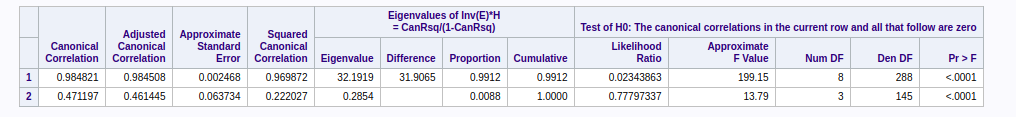


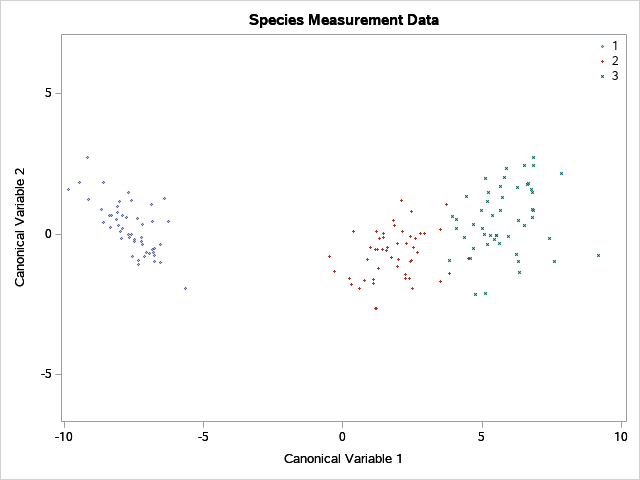


```SAS
proc sgrender data=outcan template=scatter;
run;
proc template;
define statgraph scatter;
begingraph / attrpriority=none;
entrytitle 'Species Measurement Data';
layout overlayequated / equatetype=fit
xaxisopts=(label='Canonical Variable 1')
yaxisopts=(label='Canonical Variable 2');
scatterplot x=Can1 y=Can2 / group=species name='species'
markerattrs=(size=3px);
layout gridded / autoalign=(topright);
discretelegend 'species' / border=false opaque=false;
endlayout;
endlayout;
endgraph;
end;
run;

```

#### QUESTION 1.C 
>Do we need both discriminant functions for the separation? Conduct test(s) to explain.

The first canonical correlation is at least as large as the multiple correlation between the groups and any
of the original variables. If the original variables have high within-group correlations, the first canonical
correlation can be large even if all the multiple correlations are small. In other words, the first canonical
variable can show substantial differences between the classes, even if none of the original variables do.

A test for seperation usingthe dominant eigenvalue will determine how the mean vectors are distributed in dimensional space.  If there is only one dominant eigenvalue (above 90% ) then the mean vestors will lie close to a line and will be collinear. Otherwise two or more ddominant eigenvalues
shows thst mean vectors diffuse. The null hypothesis is that all the mean vectors are the same, for all k-samples.The alternate hypothesis is where there is at least one pair of mean vectors that are not the same. In the MANOVA tests, if we reject H0, we know that there is at least one inequality where the mean vectors are not statistically different from each other, but we don’t know which mean vectors.

Our test shows that there is indeed a dominant eignevalue at 99% and the mean vector are collinear. The P value  of all our four multivaraiate test reject the null and so does the p-value of the Approimates F-value; hence we can conclude atleast one inequality.
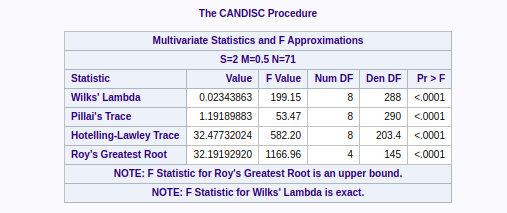

### QUESTION 1.D 
> Conduct an appropriate and complete contrast test to find out specific differences among the species, based on what you find in (b)




$$H^{(1)}_0\colon \mu_1 = \mu_2$$
$$H^{(2)}_0\colon \mu_1 = \mu_3$$
$$H^{(3)}_0\colon \mu_2 = \mu_3$$


When we reject the null hypothesis in our MANOVA tests, that means there is at least one inequality in the hypothesis and finding the contrast can help to narrow which mean vectors have that inequality. This can be comparing 1 mean vector to another mean vector, comparing 1 mean vector to 2 other mean vectors, or comparing a group of mean vectors to another group of mean vectors.

![](https://raw.githubusercontent.com/BenitaDiop/students/master/dun.png)

```SAS
proc glm;
  class species;
  model X1 X2 X3 X4 = species;
  contrast '1 v/s 2&3'
    species -1 .5 .5;
  contrast '2 v/s 3'
    species 0 1 -1;
  manova H=species/printe printh mstat=exact;
run;
```




#### QUESTION 1.E 
> Which variable does contribute most to separating the species? Explain



                |   MSE |   VAL |
                |-------|-------|
                |X1     |  0.205|
                |X2     |  0.115|
                |X3     |  0.185| 
                |X4     |  0.041|
                
                
                
                
Variable X1 has the highest root mean square error and the lowest F-value indicating the means unqual means.

#### QUESTION 1.F 
> Among linear, quadratic and k nearest neighbor classification methods, which is the best method for the iris data based on their error rates? Show all necessary work 

Among linear, quadratic and KNN claissfication methods. Based of the error rates, quadratic peformed the best. Possibly due to to its flexibility.



![](https://raw.githubusercontent.com/BenitaDiop/students/master/l.png)


```SAS
title "Quadratic Classification";
proc discrim data=iris  posterr crossvalidate; 
priors proportional; id species; class species; var X1-X4; run;
title "Linear Classification";
proc discrim data=iris pool=no crossvalidate posterr; 
priors proportional; id species; class species; var X1-X4; run;
title "KNN Classification";
proc discrim data=iris method=npar k=5 crossvalidate posterr; 
priors proportional; id species; class species; var X1-X4; run;

```

#### QUESTION 1.G 
> Use the linear classification method to assign a new observation x 0 0 = (5.1, 3.5, 1.75, 0.3) into an appropriate species. Show all necessary work.

The new observation has been classified into species 1. 


![](https://raw.githubusercontent.com/BenitaDiop/students/master/T.png)


```SAS                  
PROC SQL;
INSERT INTO iris (X1, X2, X3, X4) \
values (5.1, 3.5, 1.75, 0.3); \
RUN; \ 
proc discrim data=iris tcorr \
method=normal pool=yes  outcross=iris;\
class species; \
var X1 X2 X3 X4; run; \ 
QUIT; 
PROC PRINT DATA=iris;run;  
```

># Q2
The weekly rates of return for five stocks: JP Morgan, Citibank, Wells Fargo, Royal Dutch Shell and Exxon Mobil, listed on the New York Stock Exchange are given in file stock_price.txt.

- (a) Should we use covariance matrix or correlation matrix if we want to apply principal component analysis (PCA) to this data set? Explain.

A covariance matrix will be be a good option to use so we can see which variable most dominates the total variance. 

![](https://raw.githubusercontent.com/BenitaDiop/students/master/c.jpg)


```SAS
options ls=89;

title "stock";
data stock;
infile "/folders/myfolders/final/stock_price.txt" DLM='09'x;
input J  C  W R E;
run;
proc princomp data=stock cov plots=matrix;
proc princomp data=stock plots=matrix;
run;
```

- (b) Following your decision in part (a), show the coefficients of all principal components and the variance explained by each component.

Using the covariance matrix the percent of variation explained by the eigenvalues are 52%, 27%,  10% , 0.05% and .05% 

- (c) Show principal components for the first five observations (Use SAS output only).

![](https://raw.githubusercontent.com/BenitaDiop/students/master/tpr.jpg)

- (d) How many principal components should we keep? Explain

The first three components should be sufficient. They explain ober 89% of the total variation. But using the 90% cutoff rule I would go with the first two componenets becasue for onyl two componenets they are explaining the a lot og variation at 80%

- (e) What are the interpretations of the components retained in part (d)?

The interpretation of  the componenets retaine is thatthe first component does explains most about JP Morgran, Citibank and Wells Fargo. However the second principal component explains the remaining two variable, Royal Dutch shell and Exxon Mobil much better. 

- (f) Is there any outlier in this data set? Explain.

Observing the distribution of the component scores I would say there are no outliers. 

>#                            Q3 
A firm is attempting to evaluate the quality of its sales staff and is trying to find an examination or series of tests that may reveal the potential for good performance in sales. The firm has selected a random sample of 50 sales people and has evaluated each on 3 measures of performance: X 1 = growth of sales, X 2 = profitability of sales, and X 3 = new-account sales. Each of the 50 individuals took each of 4 tests, which purported to measure X 4 = creativity, X 5 = mechanical reasoning, X 6 = abstract reasoning, and X 7 = mathematicalability, respectively. 
The data are given in file salesman.txt

- (a) Fit a factor model with 3 factors using iterated principal factor method. Show initial estimates of communalities, and final estimates of loadings, communalities, specific variances, and the proportion of variance explained by each factor.

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image.png)
![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(1).png)

- (b) Did you find any ‘unusual’ estimate in (a)? If so, explain why it happened.

The unsual estimates were in the communalities that exceeded one and the high covariance almost at the value of one between x2 and other variables. 

- (c) Do an orthogonal rotation to the factors obtained in (a). Show the resulting loadings,communalities, specific variances, and the proportion of variance explained by each factor. Does any of those estimates not change after rotation? Explain.



The final communality estimates for the the first variable labeled x1, which accounts for the growth of sales, remains unchanged after rotation. The variance explained has spread over all factors which changed the the variance explained by each of the factors. 

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(2).png)

- (d) On which factor does profitability of sales depend most? Why? Use rotated loadings.

Profitability of sales, labeled X2 depends most on the first factor when comapred to the second and third factor laodings. Factor 1, explains most of the variance in profitability of sales. 



![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(4).png)

- (e) Show the complexity of each variable using threshold 0.6, and interpret rotated factors.

 

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(5).png)

- (f) Is the model fit in (a) sufficient for doing factor analysis to the data? If yes, explain why. If no, try to improve it.

Mechanical Reasoning, X5, has no assoicated factor, hence I would sy that the factor analysis is not sufficient. To improve the model, I believe that  introducing an additional factor will help explain the unassociated variable. 

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(3).png)





```SAS
options ls=89;
data salesman;
infile "/folders/myfolders/salesman.txt";
input X1 X2 X3 X4 X5 X6 X7;
run;

title 'Factor Analysis of Salesman';
proc factor method=prin nfact=3 rotate=varimax plots=all;
var X1-x7; 

proc factor method=prinit nfact=3 priors=smc 
heywood maxiter=100 rotate=varimax corr plots=all; run; 

proc factor method=prin priors=smc nfact=3 rotate=varimax plots=all; 
var X1-X7; run;

proc factor method=prin priors=smc nfact=4 rotate=varimax plots=all; 
var X1-X7; run; 


```

> # Q4  
*The file university.txt gives the data on some universities for certain variables used to compare or rank major universities. These variables include X 1 = average SAT score of new freshmen, X 2 = percentage of new freshmen in top 10% of high school class, X 3 = percentage of applicants accepted, X 4 = student-faculty ratio, X 5 = estimated annual expenses and
X 6 = graduation rate (%). Because SAT and Expenses are on a much different scale from that of the other variables, you need to standardize the data first.*

(a) Use hierarchical clustering with average linkage and answer the following questions.
(i) Show the resulting dendrogram and cluster history.
(ii) Decide the value of g (number of clusters) using both methods given in the lecturenotes, and show the resulting clus

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(7).png)


![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(9).png)


```SAS
options ls=89;

title "uni";
data uni;
infile "/folders/myfolders/university.txt" dlm=' ';
input uni $ X1 X2 X3 X4 X5 X6;
run;
proc standard data=uni out=uni mean=0 std=1;
var X1 X2 X3 X4 X5 X6;
run;
proc sort;by uni; run;
title "Average Linkage Cluster Analysis";    
proc cluster method=average outtree=clust1;
 var X1 X2 X3 X4 X5 X6;
  id uni;
  run;

```

- (b) Cluster the universities with K-means method. Use the first 3 observations that are at least r = 1.5 apart as seeds. Show the seeds and resulting clusters, and plot the first two discriminant functions against each other

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(13).png)




![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(11).png)

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(10).png)



```SAS
title "uni";
data uni;
infile "/folders/myfolders/university.txt" dlm=' ';
input uni $ X1 X2 X3 X4 X5 X6;
run;
proc standard data=uni out=uni mean=0 std=1;
var X1 X2 X3 X4 X5 X6;
run;
proc sort;by uni; run;
proc fastclus data=uni radius=1.5 maxc=3 replace=none maxiter=10 out=out ;
var X1 X2 X3 X4 X5 X6;
id uni;
run;
```

- (c) Redo (b) using the 3 centroids given by the hierarchical clustering in (a) as seeds. Show the seeds and resulting clusters, and compare them to those given in (b). Which seeds do give us a better clustering, the centroids in (a) or those used in (b)? Explain.




The seeds that give us a better clustering are X1 and X2 accounting for the largest correlation; Cluster two has the least relative change in cluster seeds and the smallest maximum distance from the seed to the observations.  

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(14).png)

![](https://raw.githubusercontent.com/BenitaDiop/students/master/env/image%20(15).png)


```SAS
options ls=89;

title "uni";
data uni;
infile "/folders/myfolders/university.txt" dlm=' ';
input uni $ X1 X2 X3 X4 X5 X6;
run;
proc standard data=uni out=uni mean=0 std=1;
var X1 X2 X3 X4 X5 X6;
run;
proc sort;by uni; run;
proc fastclus data=uninew maxc=3 maxiter=50 seed=Seeds out=out;
var X1 X2 X3 X4 X5 X6;
id uni;
run;
```